1 DATA UNDERSTANDING & CLEANING


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
# Load the dataset
df = pd.read_csv('apple_stock.csv')

In [4]:
print("\nDataset Overview:")
print(f"Total Records: {len(df)}")
print(f"Features: {df.columns.tolist()}")
print(f"\nFirst 5 rows:")
print(df.head())


Dataset Overview:
Total Records: 11107
Features: ['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']

First 5 rows:
         Date  Adj Close     Close      High       Low      Open     Volume
0  1980-12-12   0.098834  0.128348  0.128906  0.128348  0.128348  469033600
1  1980-12-15   0.093678  0.121652  0.122210  0.121652  0.122210  175884800
2  1980-12-16   0.086802  0.112723  0.113281  0.112723  0.113281  105728000
3  1980-12-17   0.088951  0.115513  0.116071  0.115513  0.115513   86441600
4  1980-12-18   0.091530  0.118862  0.119420  0.118862  0.118862   73449600


In [5]:
# Check data types
print("\nData Types:")
print(df.dtypes)


Data Types:
Date          object
Adj Close    float64
Close        float64
High         float64
Low          float64
Open         float64
Volume         int64
dtype: object


In [6]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64


In [7]:
# Check for duplicates
print(f"\nDuplicate Rows: {df.duplicated().sum()}")


Duplicate Rows: 0


In [8]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)

In [9]:
# Basic statistics
print("\nSummary:")
print(df.describe())


Summary:
                                Date     Adj Close         Close  \
count                          11107  11107.000000  11107.000000   
mean   2002-12-14 15:31:54.576393216     23.522229     24.357607   
min              1980-12-12 00:00:00      0.037815      0.049107   
25%              1991-12-05 12:00:00      0.243402      0.300290   
50%              2002-12-10 00:00:00      0.446682      0.542411   
75%              2013-12-19 12:00:00     18.260086     21.397143   
max              2025-01-03 00:00:00    259.019989    259.019989   
std                              NaN     49.767881     50.217498   

               High           Low          Open        Volume  
count  11107.000000  11107.000000  11107.000000  1.110700e+04  
mean      24.598169     24.092608     24.339076  3.154341e+08  
min        0.049665      0.049107      0.049665  0.000000e+00  
25%        0.306362      0.292411      0.300090  1.111164e+08  
50%        0.553393      0.534598      0.542679  2.036944

In [10]:
# Check date range
print(f"\nDate Range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Total Trading Days: {len(df)}")


Date Range: 1980-12-12 00:00:00 to 2025-01-03 00:00:00
Total Trading Days: 11107


2 EXPLORATORY DATA ANALYSIS

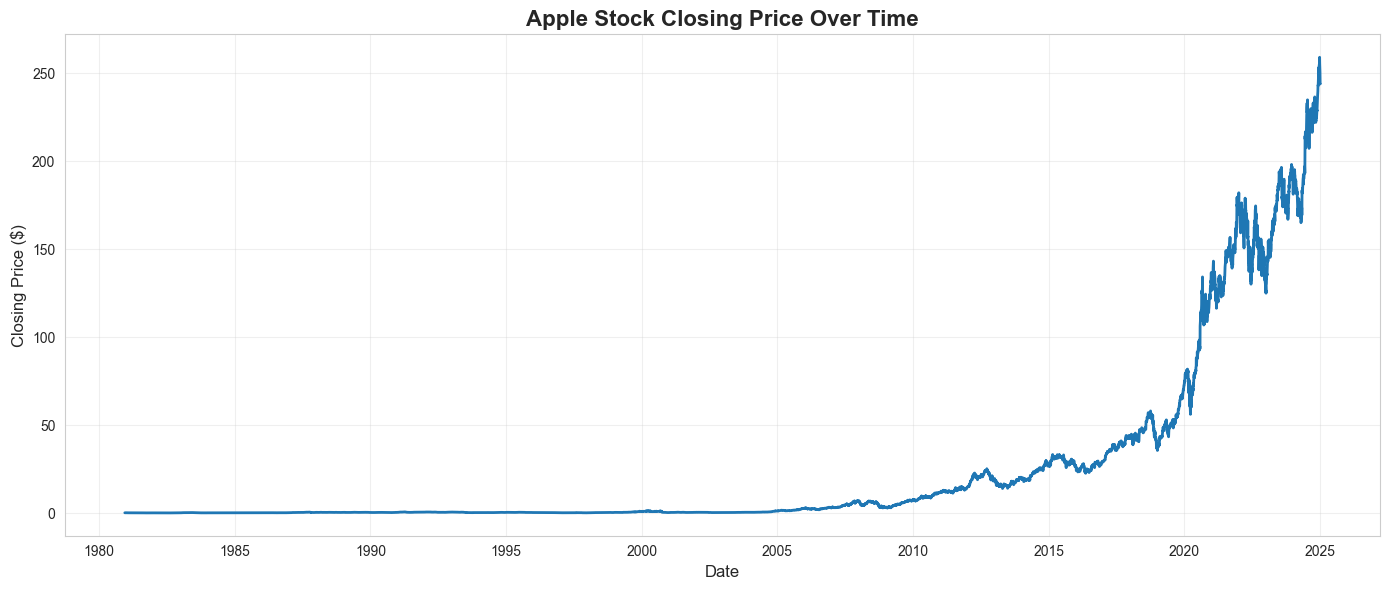

In [11]:
# 1. Closing Price Over Time
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], linewidth=2, color='#1f77b4')
plt.title('Apple Stock Closing Price Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

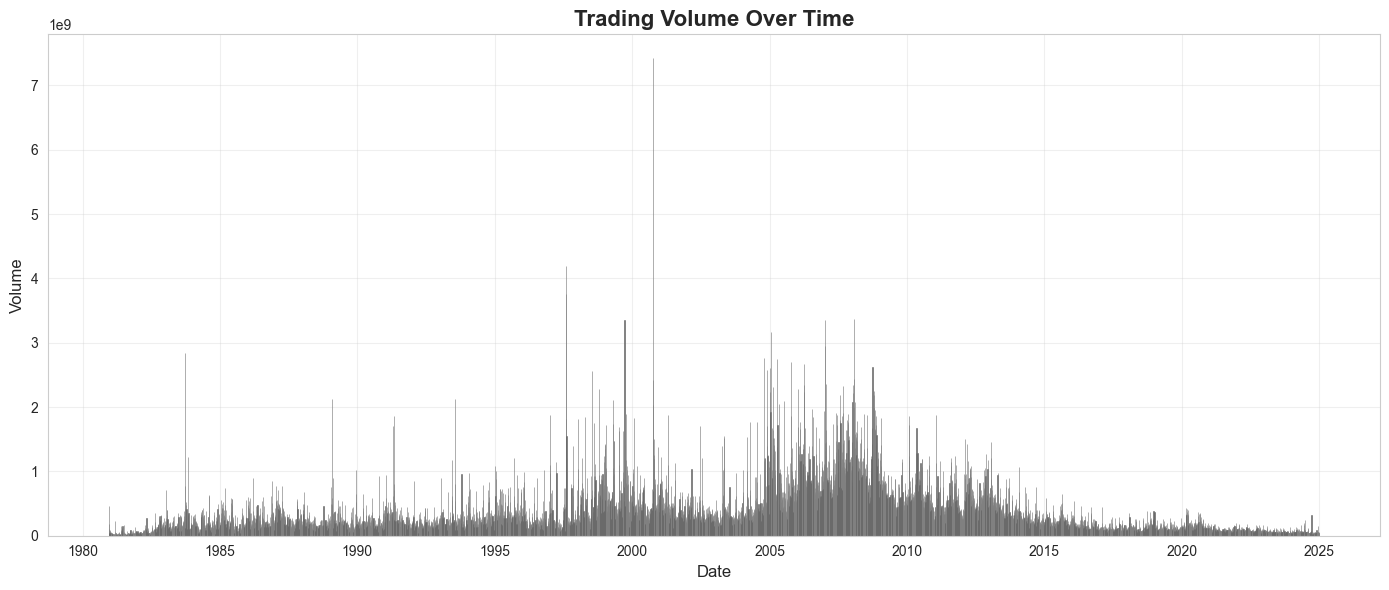

In [12]:
plt.figure(figsize=(14, 6))
plt.bar(df['Date'], df['Volume'], 
        color='black', edgecolor='gray', linewidth=0.5, alpha=0.9)
plt.title('Trading Volume Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


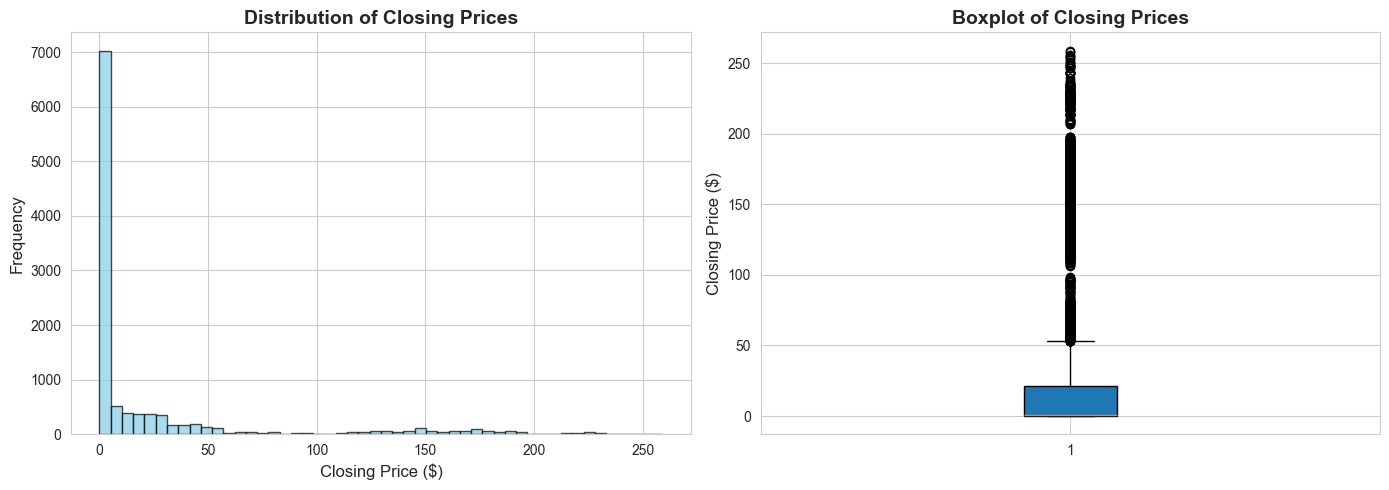

In [13]:
# 3. Distribution of Closing Prices
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Close'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Closing Prices', fontsize=14, fontweight='bold')
plt.xlabel('Closing Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.subplot(1, 2, 2)
plt.boxplot(df['Close'], vert=True, patch_artist=True)
plt.title('Boxplot of Closing Prices', fontsize=14, fontweight='bold')
plt.ylabel('Closing Price ($)', fontsize=12)
plt.tight_layout()
plt.show()

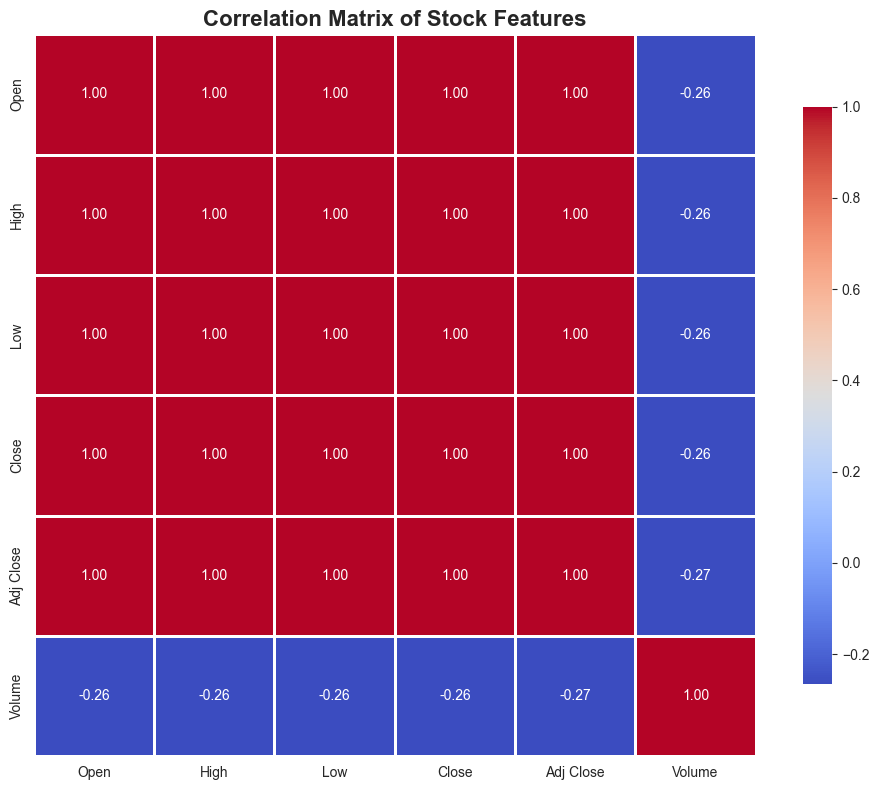

In [14]:
# 4. Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Stock Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

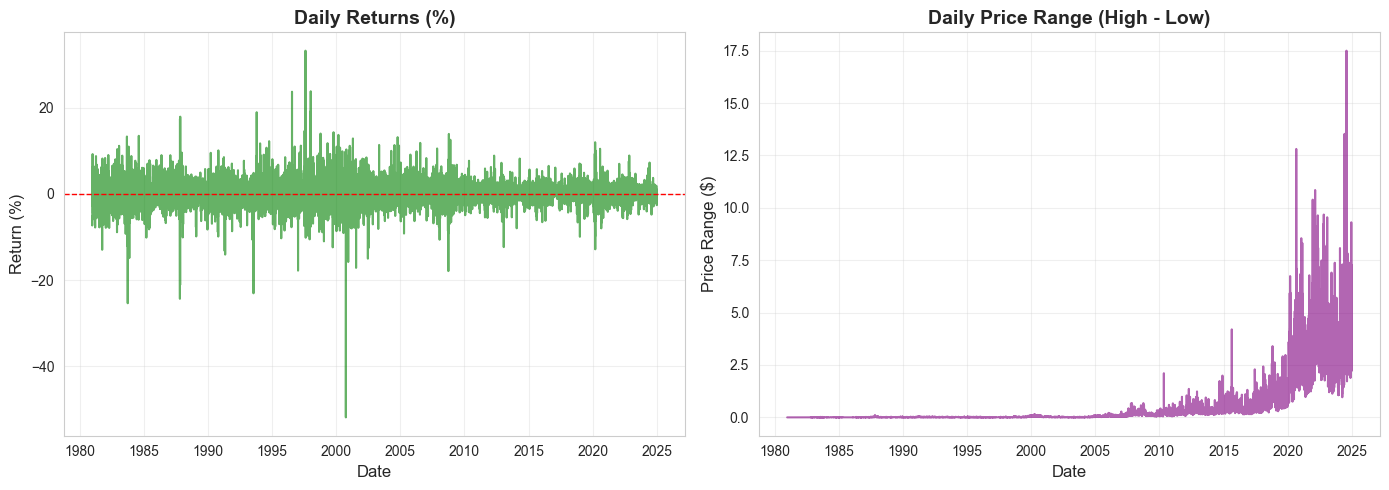

In [15]:
# 5. Daily Price Change Analysis
df['Daily_Return'] = df['Close'].pct_change() * 100
df['Price_Range'] = df['High'] - df['Low']

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(df['Date'], df['Daily_Return'], color='green', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.title('Daily Returns (%)', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Return (%)', fontsize=12)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(df['Date'], df['Price_Range'], color='purple', alpha=0.6)
plt.title('Daily Price Range (High - Low)', fontsize=14, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price Range ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


 FEATURE ENGINEERING & MODEL BUILDING

In [16]:
# Create features for prediction
df['Target'] = df['Close'].shift(-1)  # Next day's closing price
df = df.dropna()  # Remove last row with NaN target

# Create additional technical features
df['MA_5'] = df['Close'].rolling(window=5).mean()  # 5-day moving average
df['MA_10'] = df['Close'].rolling(window=10).mean()  # 10-day moving average
df['Volatility'] = df['Close'].rolling(window=5).std()  # 5-day volatility
df['Volume_MA'] = df['Volume'].rolling(window=63).mean()  # 3-month volume moving average


In [17]:
# Remove NaN values created by rolling calculations
df = df.dropna()

In [18]:
# Select features for modeling
feature_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 
                   'MA_5', 'MA_10', 'Volatility', 'Volume_MA']

X = df[feature_columns]
y = df['Target']

print(f"\nFeatures created: {feature_columns}")
print(f"Dataset size after feature engineering: {len(df)} samples")


Features created: ['Open', 'High', 'Low', 'Close', 'Volume', 'MA_5', 'MA_10', 'Volatility', 'Volume_MA']
Dataset size after feature engineering: 11043 samples


In [19]:
# Train-Test Split (80-20)
from sklearn.model_selection import train_test_split

split_index = int(len(df) * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

print(f"\nTraining Set Size: {len(X_train)} samples")
print(f"Testing Set Size: {len(X_test)} samples")


Training Set Size: 8834 samples
Testing Set Size: 2209 samples


In [20]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

MODEL 1: LINEAR REGRESSION

In [21]:
print("MODEL 1: LINEAR REGRESSION")

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr_train = lr_model.predict(X_train_scaled)
y_pred_lr_test = lr_model.predict(X_test_scaled)

# Evaluation
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr_test))
lr_mae = mean_absolute_error(y_test, y_pred_lr_test)
lr_r2 = r2_score(y_test, y_pred_lr_test)

print(f"RMSE: ${lr_rmse:.2f}")
print(f"MAE: ${lr_mae:.2f}")
print(f"R^2 Score: {lr_r2:.4f}")

MODEL 1: LINEAR REGRESSION
RMSE: $2.09
MAE: $1.34
R^2 Score: 0.9989


MODEL 2: RANDOM FOREST REGRESSOR

In [22]:
print("MODEL 2: RANDOM FOREST REGRESSOR")

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf_train = rf_model.predict(X_train_scaled)
y_pred_rf_test = rf_model.predict(X_test_scaled)

# Evaluation
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf_test))
rf_mae = mean_absolute_error(y_test, y_pred_rf_test)
rf_r2 = r2_score(y_test, y_pred_rf_test)

print(f"RMSE: ${rf_rmse:.2f}")
print(f"MAE: ${rf_mae:.2f}")
print(f"R^2 Score: {rf_r2:.4f}")

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

MODEL 2: RANDOM FOREST REGRESSOR
RMSE: $97.87
MAE: $74.31
R^2 Score: -1.3129

Feature Importance:
      Feature  Importance
3       Close    0.340992
2         Low    0.211465
1        High    0.199803
0        Open    0.145264
6       MA_10    0.058844
5        MA_5    0.043517
8   Volume_MA    0.000052
4      Volume    0.000036
7  Volatility    0.000027


MODEL 3: XGBOOST REGRESSOR

In [23]:
print("MODEL 3: XGBOOST REGRESSOR")

from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, 
                         max_depth=5, random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_xgb_train = xgb_model.predict(X_train_scaled)
y_pred_xgb_test = xgb_model.predict(X_test_scaled)

# Evaluation
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb_test))
xgb_mae = mean_absolute_error(y_test, y_pred_xgb_test)
xgb_r2 = r2_score(y_test, y_pred_xgb_test)

print(f"RMSE: ${xgb_rmse:.2f}")
print(f"MAE: ${xgb_mae:.2f}")
print(f"R^2 Score: {xgb_r2:.4f}")

MODEL 3: XGBOOST REGRESSOR
RMSE: $98.17
MAE: $74.60
R^2 Score: -1.3271


MODEL COMPARISON

MODEL COMPARISON
            Model      RMSE       MAE  R² Score
Linear Regression  2.088005  1.339227  0.998947
    Random Forest 97.874028 74.307585 -1.312940
          XGBoost 98.172599 74.600153 -1.327073


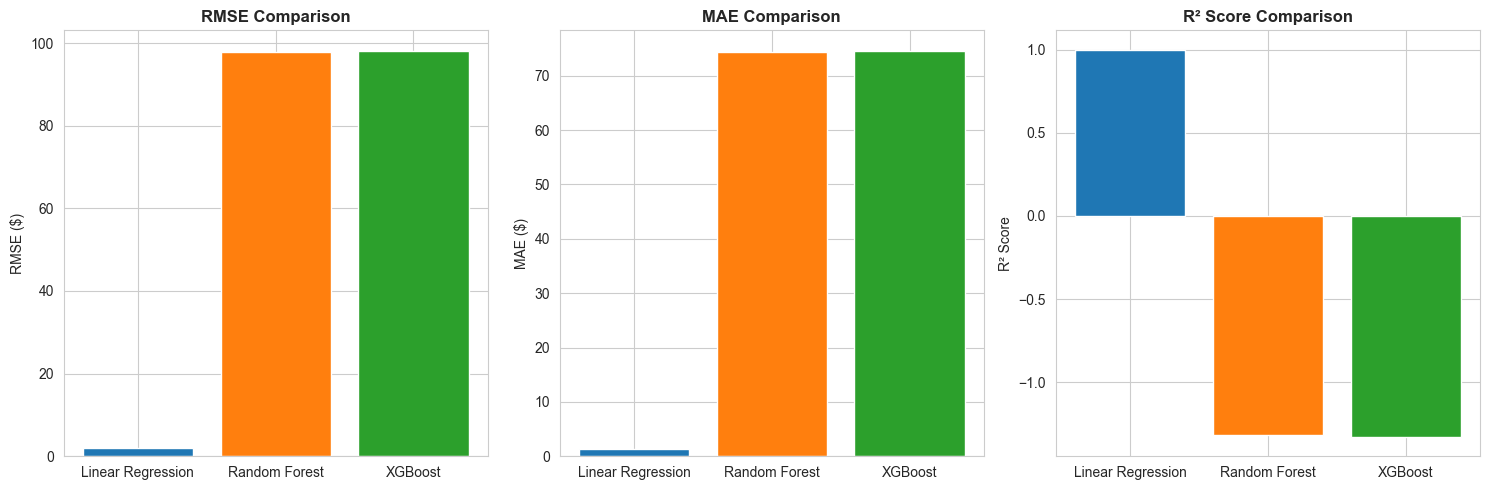

In [24]:
print("MODEL COMPARISON")

comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'RMSE': [lr_rmse, rf_rmse, xgb_rmse],
    'MAE': [lr_mae, rf_mae, xgb_mae],
    'R² Score': [lr_r2, rf_r2, xgb_r2]
})

print(comparison_df.to_string(index=False))

# Visualization of Model Comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

models = ['Linear Regression', 'Random Forest', 'XGBoost']
rmse_values = [lr_rmse, rf_rmse, xgb_rmse]
mae_values = [lr_mae, rf_mae, xgb_mae]
r2_values = [lr_r2, rf_r2, xgb_r2]

axes[0].bar(models, rmse_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[0].set_title('RMSE Comparison', fontweight='bold')
axes[0].set_ylabel('RMSE ($)')

axes[1].bar(models, mae_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[1].set_title('MAE Comparison', fontweight='bold')
axes[1].set_ylabel('MAE ($)')

axes[2].bar(models, r2_values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
axes[2].set_title('R² Score Comparison', fontweight='bold')
axes[2].set_ylabel('R² Score')

plt.tight_layout()
plt.show()


Best Model: Linear Regression


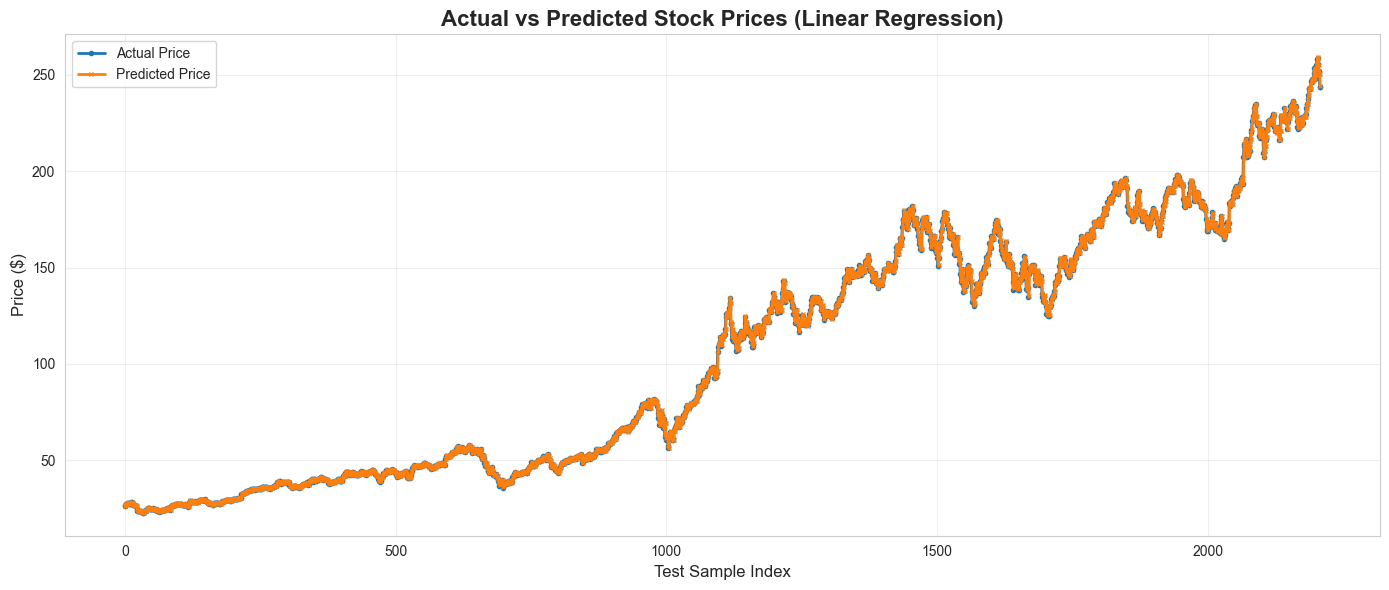

In [25]:
# Best Model Selection
best_model_idx = np.argmin([rf_rmse, xgb_rmse, lr_rmse])
best_model_name = ['Random Forest', 'XGBoost', 'Linear Regression'][best_model_idx]

print(f"\nBest Model: {best_model_name}")

# Actual vs Predicted Plot for Best Model
plt.figure(figsize=(14, 6))

if best_model_name == 'Random Forest':
    y_pred_best = y_pred_rf_test
elif best_model_name == 'XGBoost':
    y_pred_best = y_pred_xgb_test
else:
    y_pred_best = y_pred_lr_test

plt.plot(range(len(y_test)), y_test.values, label='Actual Price', 
         linewidth=2, marker='o', markersize=3)
plt.plot(range(len(y_test)), y_pred_best, label='Predicted Price', 
         linewidth=2, marker='x', markersize=3)
plt.title(f'Actual vs Predicted Stock Prices ({best_model_name})', 
          fontsize=16, fontweight='bold')
plt.xlabel('Test Sample Index', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

SELECTING THE BEST MODEL

In [26]:
import pickle

# Save the best model and scaler
if best_model_name == 'Random Forest':
    best_model = rf_model
elif best_model_name == 'XGBoost':
    best_model = xgb_model
else:
    best_model = lr_model

with open('stock_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


SUMMARY

In [27]:

print("SUMMARY")


print(f"""
Problem Statement:
   Predict the next day's closing price of Apple stock using historical data.
""")

print(f"""
 Dataset:
   - Source: apple_stock.csv
   - Features: Open, High, Low, Close, Adj Close, Volume
   - Total Samples: {len(df)}
   - Date Range: {df['Date'].min()} to {df['Date'].max()}
""")

print(f"""
 Models Trained:
   1. Linear Regression (RMSE: ${lr_rmse:.2f}, R²: {lr_r2:.4f})
   2. Random Forest (RMSE: ${rf_rmse:.2f}, R²: {rf_r2:.4f})
   3. XGBoost (RMSE: ${xgb_rmse:.2f}, R²: {xgb_r2:.4f})
""")

print(f"""
 Best Model: {best_model_name}
   - RMSE: ${min(lr_rmse, rf_rmse, xgb_rmse):.2f}
   - R² Score: {max(lr_r2, rf_r2, xgb_r2):.4f}
""")

print(f"""
 Key Features Used:
   {', '.join(feature_columns)}
""")

print(f"""
 Limitations:
   - Model assumes market patterns continue (no black swan events)
   - External factors (news, economy) not included
   - Limited to technical indicators only
""")


SUMMARY

Problem Statement:
   Predict the next day's closing price of Apple stock using historical data.


 Dataset:
   - Source: apple_stock.csv
   - Features: Open, High, Low, Close, Adj Close, Volume
   - Total Samples: 11043
   - Date Range: 1981-03-16 00:00:00 to 2025-01-02 00:00:00


 Models Trained:
   1. Linear Regression (RMSE: $2.09, R²: 0.9989)
   2. Random Forest (RMSE: $97.87, R²: -1.3129)
   3. XGBoost (RMSE: $98.17, R²: -1.3271)


 Best Model: Linear Regression
   - RMSE: $2.09
   - R² Score: 0.9989


 Key Features Used:
   Open, High, Low, Close, Volume, MA_5, MA_10, Volatility, Volume_MA


 Limitations:
   - Model assumes market patterns continue (no black swan events)
   - External factors (news, economy) not included
   - Limited to technical indicators only

